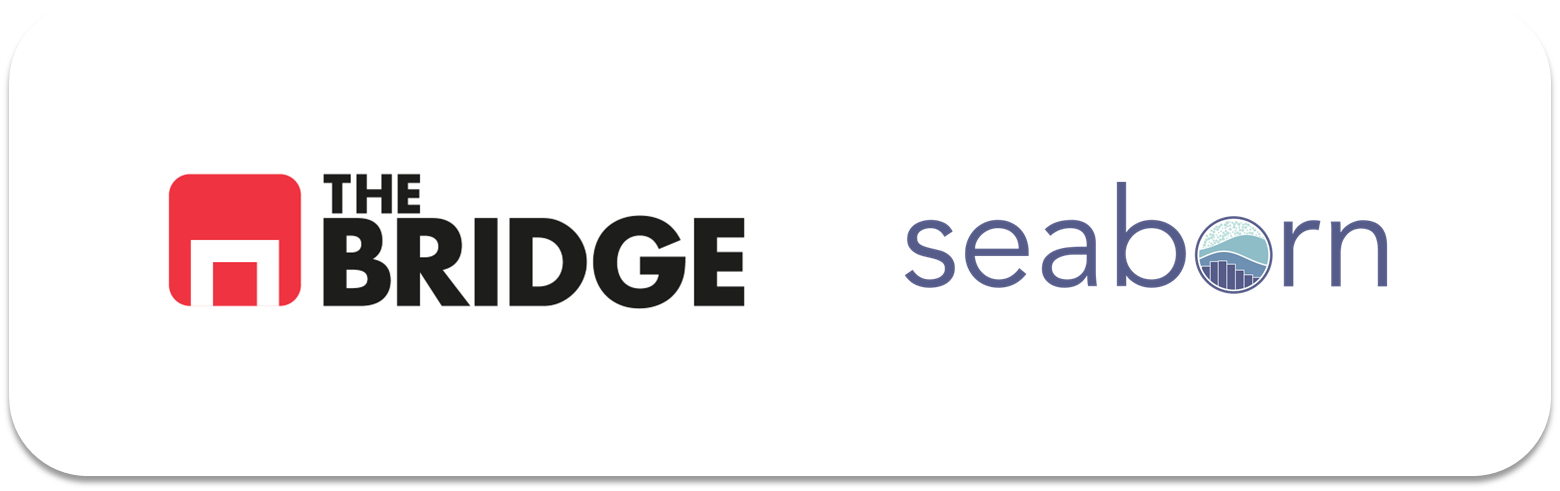

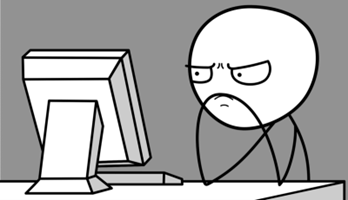

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [2]:
# Ruta del archivo CSV
file_path = r"C:\Users\hp\Desktop\Python Scripts\dataset_viajes_jul23.csv"

# Cargar el archivo como texto crudo y verificar delimitador
with open(file_path, 'r', encoding='latin1') as file:
    raw_data = file.readline()
    print("Primera línea del archivo (verificar delimitador):")
    print(raw_data)

# Cargar el archivo con un delimitador correcto
df_viajes = pd.read_csv(file_path, delimiter=',', encoding='latin1')  # Si sigue sin funcionar, intenta cambiar ',' a ';'

# Forzar separación manual si las columnas siguen combinadas
if len(df_viajes.columns) == 1:
    print("Columnas no separadas correctamente. Intentando dividirlas manualmente...")
    df_viajes = df_viajes.iloc[:, 0].str.split(',', expand=True)
    df_viajes.columns = ['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala', 
                         'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes']

# Verificar las columnas disponibles
print("Columnas disponibles en el DataFrame después de corrección:")
print(df_viajes.columns)


Primera línea del archivo (verificar delimitador):
"aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes"

Columnas no separadas correctamente. Intentando dividirlas manualmente...
Columnas disponibles en el DataFrame después de corrección:
Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')


In [3]:
# Ruta completa del archivo titanic.csv
file_path_titanic = r"C:\Users\hp\Desktop\Python Scripts\titanic.csv"

try:
    df_titanic = pd.read_csv(file_path_titanic, encoding="latin1")  # Cambiar a la codificación correcta si es necesario
    print("\nPrimeros registros del archivo titanic.csv:")
    print(df_titanic.head())
except UnicodeDecodeError as e:
    print(f"Error al cargar el archivo titanic.csv: {e}")


Primeros registros del archivo titanic.csv:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [4]:
def plot_and_contingency(dataframe, col1, col2):
    """
    Función para graficar las frecuencias absolutas de dos columnas categóricas,
    comparar sus valores mediante un catplot y devolver la tabla de contingencia.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    col1 (str): Nombre de la primera columna categórica.
    col2 (str): Nombre de la segunda columna categórica.

    Returns:
    pd.DataFrame: Tabla de contingencia entre las dos columnas categóricas.
    """
    # Crear subplots: 1 fila, 2 columnas
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

    # Gráfica de frecuencias absolutas de col1
    sns.countplot(data=dataframe, x=col1, ax=axes[0])
    axes[0].set_title(f"Frecuencias Absolutas de {col1}")
    axes[0].set_xlabel(col1)
    axes[0].set_ylabel("Frecuencia")

    # Gráfica de frecuencias absolutas de col2
    sns.countplot(data=dataframe, x=col2, ax=axes[1])
    axes[1].set_title(f"Frecuencias Absolutas de {col2}")
    axes[1].set_xlabel(col2)
    axes[1].set_ylabel("Frecuencia")

    # Mostrar los subplots
    plt.show()

    # Crear un catplot para la comparación de col1 y col2
    sns.catplot(data=dataframe, x=col1, col=col2, kind="count", height=4, aspect=1.5)
    plt.show()

    # Crear y devolver la tabla de contingencia
    contingency_table = pd.crosstab(dataframe[col1], dataframe[col2])
    return contingency_table


### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

Comparación entre 'alive' y 'who':


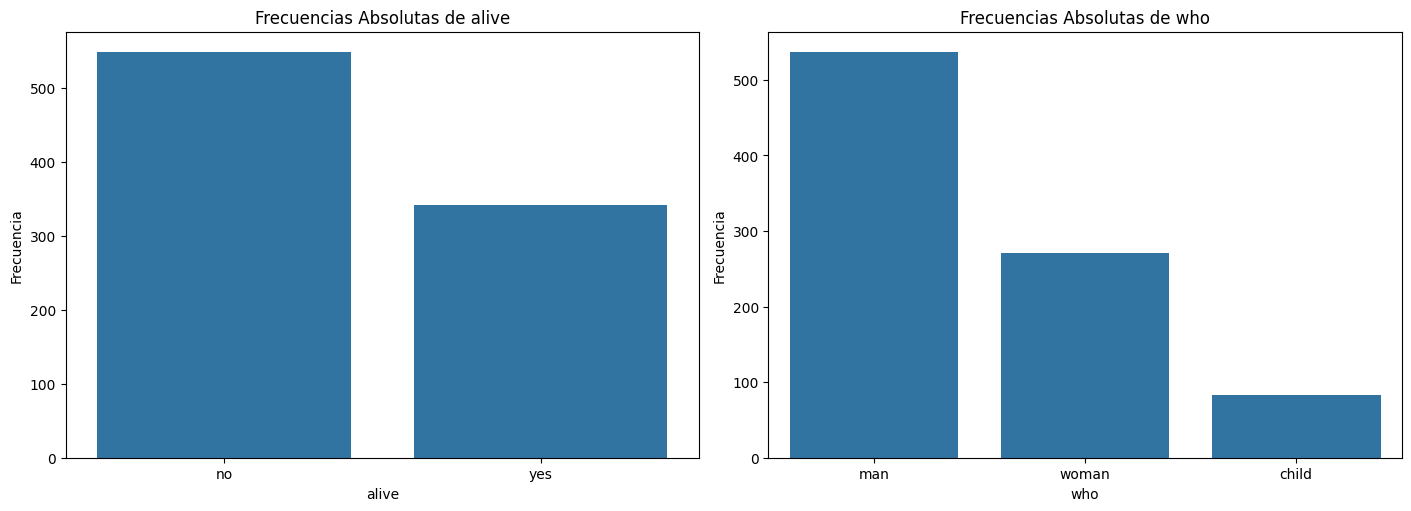

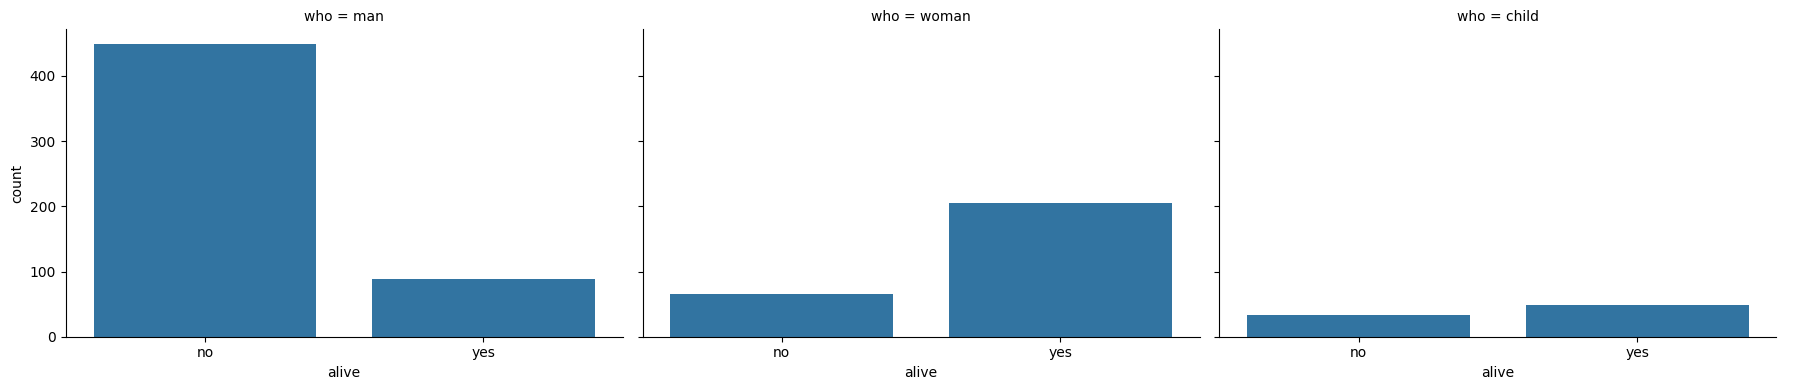


Tabla de Contingencia entre 'alive' y 'who':
who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205


In [7]:
# Comparar "alive" y "who"
print("Comparación entre 'alive' y 'who':")
contingency_alive_who = plot_and_contingency(df_titanic, col1="alive", col2="who")
print("\nTabla de Contingencia entre 'alive' y 'who':")
print(contingency_alive_who)



#### Alive y Class


Comparación entre 'alive' y 'class':


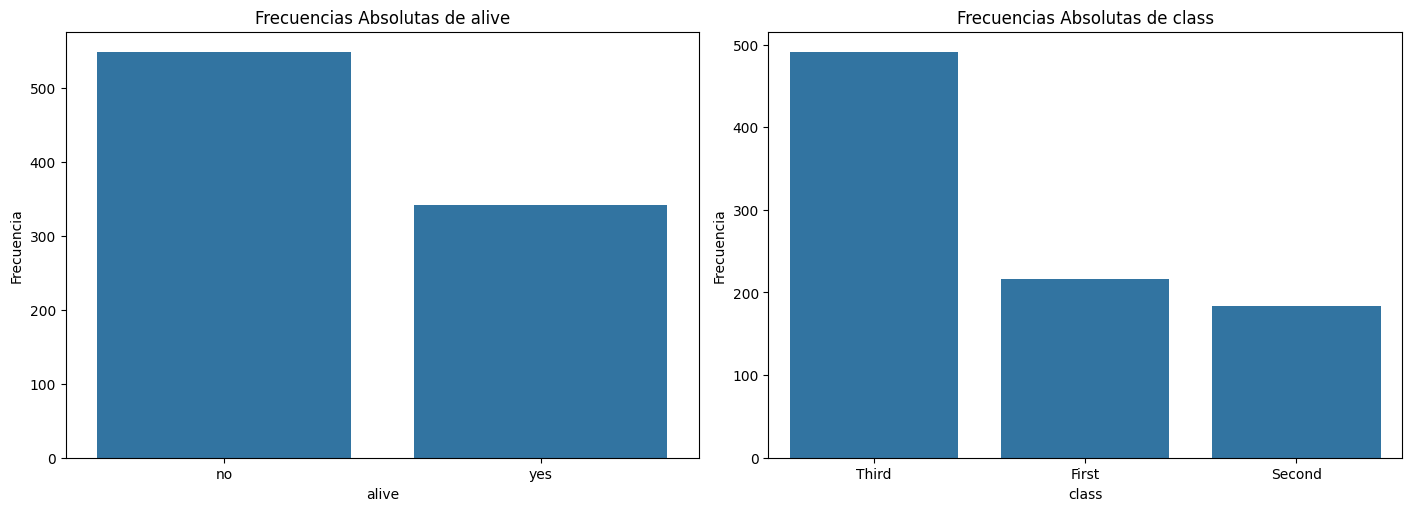

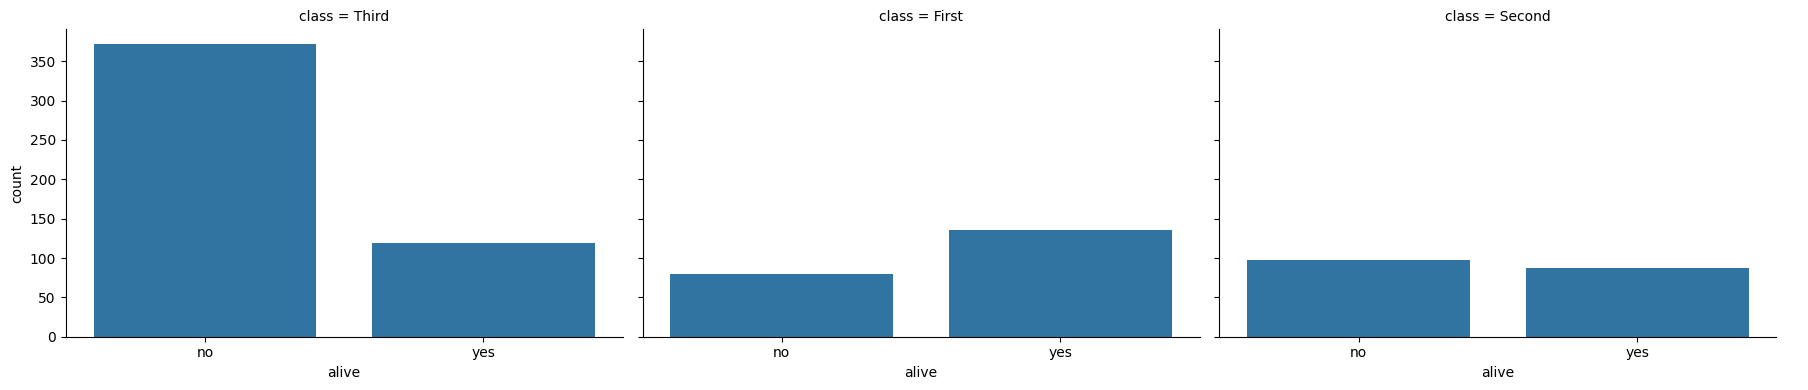


Tabla de Contingencia entre 'alive' y 'class':
class  First  Second  Third
alive                      
no        80      97    372
yes      136      87    119


In [6]:
# Comparar "alive" y "class"
print("\nComparación entre 'alive' y 'class':")
contingency_alive_class = plot_and_contingency(df_titanic, col1="alive", col2="class")
print("\nTabla de Contingencia entre 'alive' y 'class':")
print(contingency_alive_class)

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [8]:
import math

def compare_categorical_numerical(dataframe, cat_column, num_column):
    """
    Función para graficar histogramas de una columna numérica filtrados por valores de una columna categórica.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    cat_column (str): Nombre de la columna categórica.
    num_column (str): Nombre de la columna numérica.
    """
    # Obtener los valores únicos de la columna categórica
    unique_values = dataframe[cat_column].dropna().unique()
    n_values = len(unique_values)

    # Configuración de subplots: 3 columnas como máximo
    cols = 3
    rows = math.ceil(n_values / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

    # Asegurar que axes sea un array bidimensional
    axes = axes.flatten()

    # Dibujar cada gráfica en los ejes correspondientes
    for i, value in enumerate(unique_values):
        # Filtrar el DataFrame por el valor actual de la columna categórica
        filtered_data = dataframe[dataframe[cat_column] == value]
        
        # Graficar el histograma de la columna numérica
        sns.histplot(data=filtered_data, x=num_column, kde=False, ax=axes[i])
        
        # Añadir título a la gráfica
        axes[i].set_title(f"Histograma de {num_column} para {cat_column} = {value}")
        axes[i].set_xlabel(num_column)
        axes[i].set_ylabel("Frecuencia")

    # Ocultar los ejes vacíos
    for j in range(n_values, len(axes)):
        axes[j].axis('off')

    # Mostrar la figura
    plt.show()

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

Histogramas de 'ingresos' por compañía aérea:


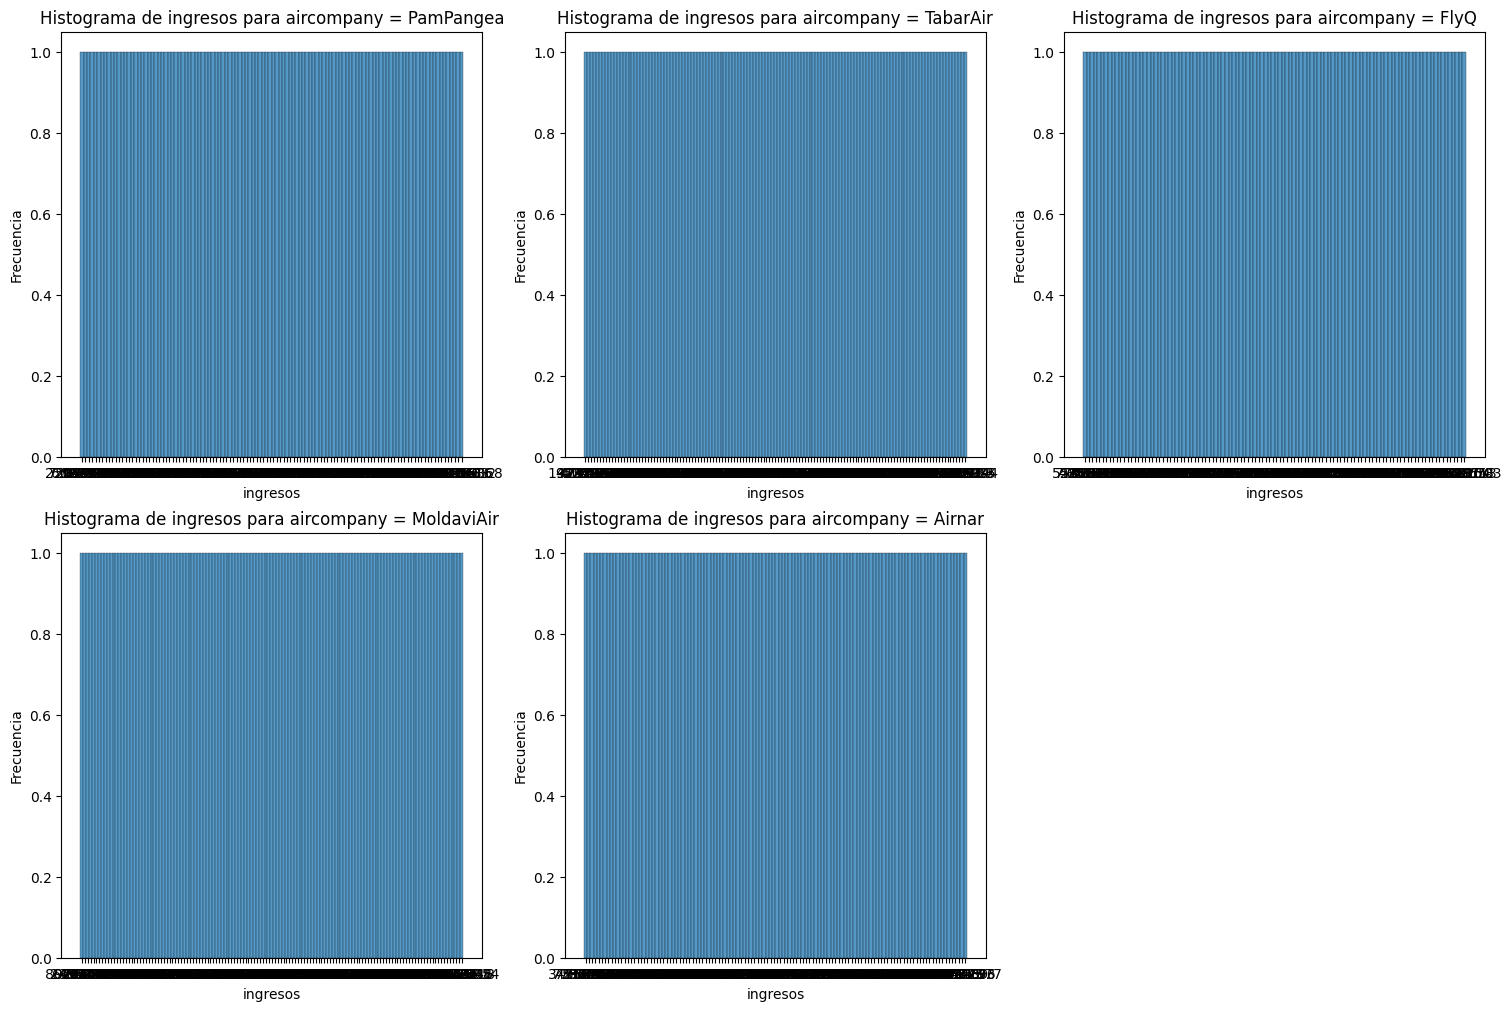

In [11]:
# Aplicar la función para "ingresos" por "aircompany"
print("Histogramas de 'ingresos' por compañía aérea:")
compare_categorical_numerical(df_viajes, cat_column="aircompany", num_column="ingresos")



#### Aircompany y Consumo_kg

Histogramas de 'consumo_kg' por compañía aérea:


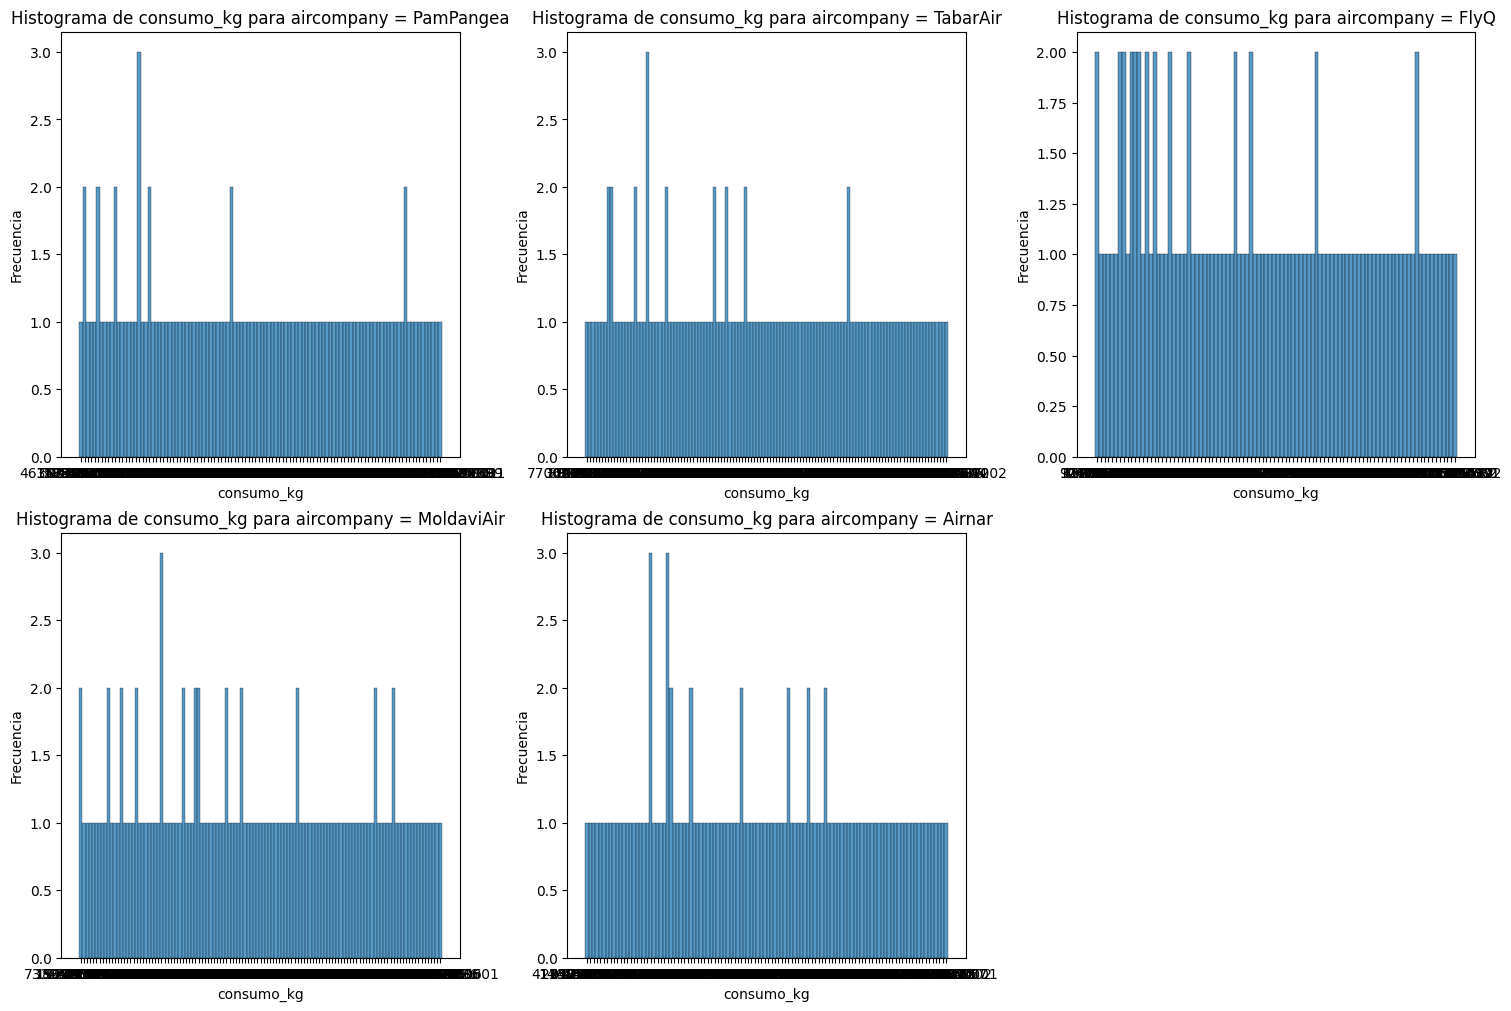

In [10]:
#Aplicar la función para "consumo_kg" por "aircompany"
print("Histogramas de 'consumo_kg' por compañía aérea:")
compare_categorical_numerical(df_viajes, cat_column="aircompany", num_column="consumo_kg")

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [12]:
def scatter_plot(dataframe, num_col1, num_col2, cat_col=None, point_size=50):
    """
    Función para pintar un diagrama de dispersión con opciones de color por categoría y tamaño de puntos.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    num_col1 (str): Nombre de la primera columna numérica (eje X).
    num_col2 (str): Nombre de la segunda columna numérica (eje Y).
    cat_col (str, optional): Nombre de la columna categórica (por defecto None).
    point_size (int): Tamaño de los puntos en el diagrama de dispersión.
    """
    plt.figure(figsize=(10, 6))

    if cat_col:
        # Diagrama de dispersión con color basado en la columna categórica
        sns.scatterplot(
            data=dataframe,
            x=num_col1,
            y=num_col2,
            hue=cat_col,
            size=None,
            s=point_size,
            palette="Set2"
        )
    else:
        # Diagrama de dispersión sin color categórico
        sns.scatterplot(
            data=dataframe,
            x=num_col1,
            y=num_col2,
            size=None,
            s=point_size
        )

    # Personalizar el título y los ejes
    plt.title(f"Diagrama de dispersión: {num_col1} vs {num_col2}")
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)

    # Mostrar la leyenda sólo si hay columna categórica
    if cat_col:
        plt.legend(title=cat_col, loc='best')

    plt.show()

### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

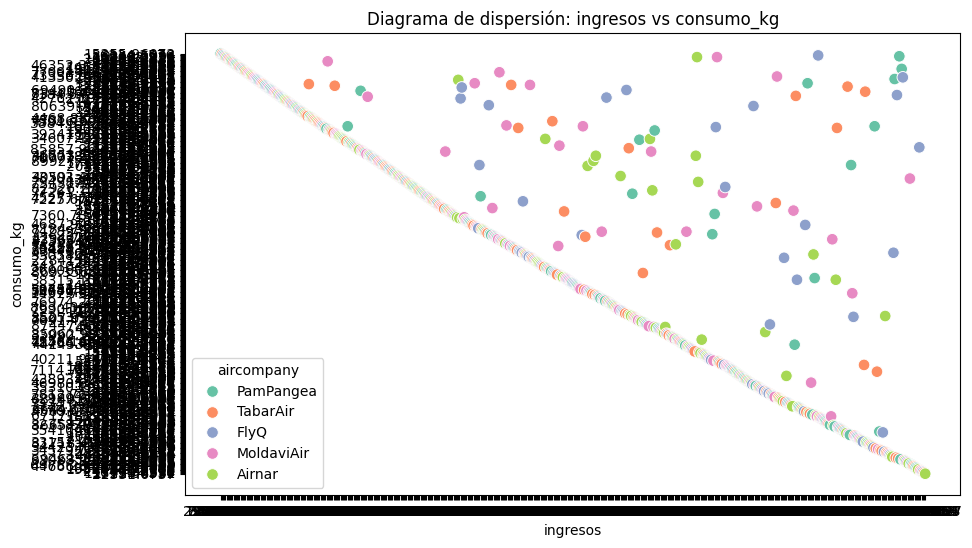

In [13]:
# Comparativa entre "ingresos", "consumo_kg" y "aircompany"
scatter_plot(
    dataframe=df_viajes,
    num_col1="ingresos",
    num_col2="consumo_kg",
    cat_col="aircompany",
    point_size=70
)

Categorías disponibles en aircompany:
['PamPangea' 'TabarAir' 'FlyQ' 'MoldaviAir' 'Airnar']


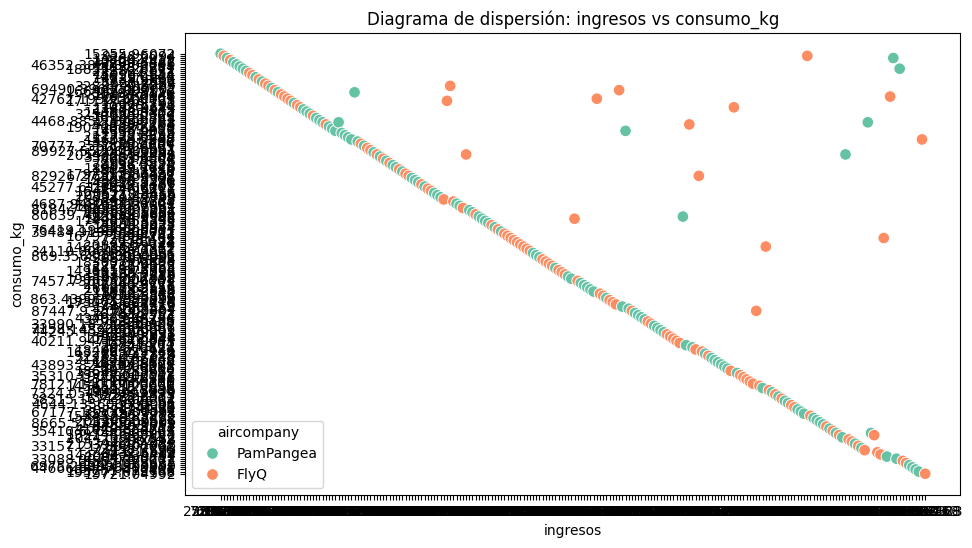

In [16]:
#Usar una paleta de colores más distintiva o limitar la visualización a unas pocas categorías relevantes:
# Verificar las categorías de "aircompany"
print("Categorías disponibles en aircompany:")
print(df_viajes["aircompany"].unique())

# Ajustar el filtro para compañías válidas
filtered_df = df_viajes[df_viajes["aircompany"].isin(["PamPangea", "FlyQ"])]  # Ajustar según las compañías reales

# Verificar si el subconjunto tiene datos
if filtered_df.empty:
    print("El subconjunto filtrado está vacío. Revisa las categorías en 'aircompany'.")
else:
    # Aplicar la función con el subconjunto válido
    scatter_plot(
        dataframe=filtered_df,
        num_col1="ingresos",
        num_col2="consumo_kg",
        cat_col="aircompany",
        point_size=70
    )

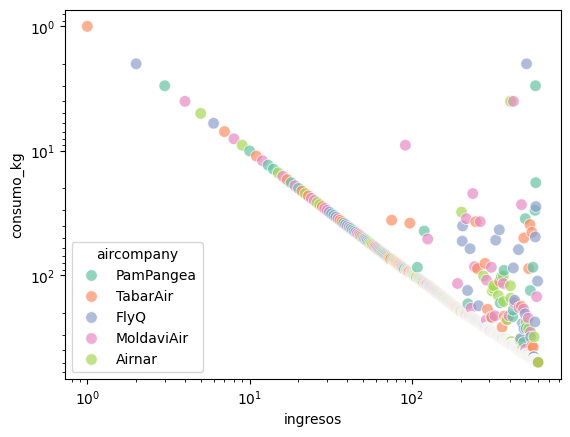

In [19]:
sns.scatterplot(
    data=df_viajes,
    x="ingresos",
    y="consumo_kg",
    hue="aircompany",
    s=70,
    alpha=0.7,  # Transparencia
    palette="Set2"
    

)

plt.xscale("log")
plt.yscale("log")

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

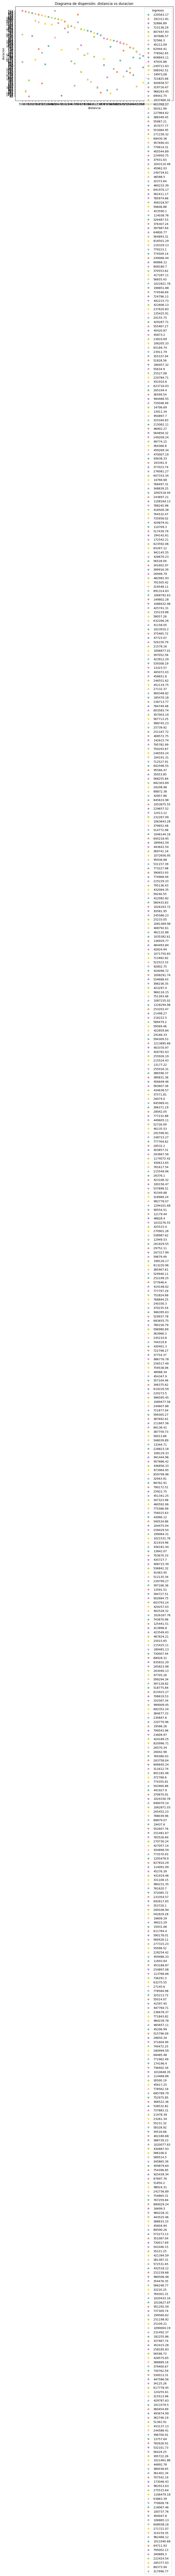

In [20]:
# Comparativa entre "distancia", "duracion" e "ingresos"
scatter_plot(
    dataframe=df_viajes,
    num_col1="distancia",
    num_col2="duracion",
    cat_col="ingresos",
    point_size=50
)

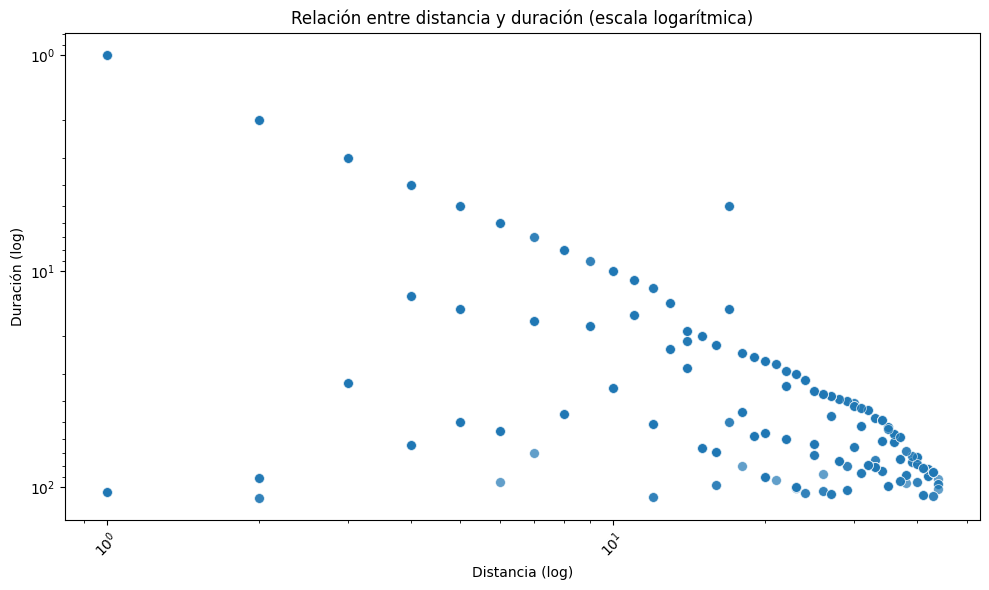

In [21]:
# Diagrama de dispersión mejorado
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_viajes,
    x="distancia",
    y="duracion",
    s=50,
    alpha=0.7  # Transparencia para reducir superposiciones
)

# Escalas logarítmicas en los ejes
plt.xscale("log")
plt.yscale("log")

# Personalización de la gráfica
plt.title("Relación entre distancia y duración (escala logarítmica)")
plt.xlabel("Distancia (log)")
plt.ylabel("Duración (log)")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()